## Working on Time Series with Pandas


* Forecasting: Principles and Practice (3rd ed) [link](https://otexts.com/fpp3/)
* Pandas documentation for time series(https://pandas.pydata.org/docs/user_guide/timeseries.html)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
 # generate three timestamps startting from "2023-01-01" with frequncy of "1 hr"

ts_index = pd.date_range(start = "2023-01-01", periods=3, freq="H")
ts_index

DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 01:00:00',
               '2023-01-01 02:00:00'],
              dtype='datetime64[ns]', freq='H')

Some of the commonly used `freq` tags

| Date Offset | Frequency String | Description        |
|-------------|------------------|--------------------|
| MonthEnd    | 'M'              | calendar month end |
| Day         | 'D'              | one absolute day   |
| Hour        | 'H'              | one hour           |
| Minute      | 'T' or 'min'     | one minute         |
| Second      | 'S'              | one second         |

*Check this for other supported "freq" tags:
https://pandas.pydata.org/docs/user_guide/timeseries.html#dateoffset-objects*



**Manipulating and converting date times with timezone information**

In [ ]:
# date time with time zones

# time zone as UTC
print(ts_index.tz_localize("UTC"))

# time zone as Asia/kokata
print(ts_index.tz_localize("Asia/kolkata"))

DatetimeIndex(['2023-01-01 00:00:00+00:00', '2023-01-01 01:00:00+00:00',
               '2023-01-01 02:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='H')
DatetimeIndex(['2023-01-01 00:00:00+05:30', '2023-01-01 01:00:00+05:30',
               '2023-01-01 02:00:00+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', freq=None)


____
**Task - 1**
____

Your manager has given you a climate dataset having 1000 rows and asked you to perform analysis, the data **does not have a timestamp column**. You are informed that each row of this data represents outputs from different sensors.

Your manager added that the observations were made starting from "*12th jan 2020*" and is **daily data**, meaning one obersrvation recorded per day starting from `2020-01-12`.

* Create a datetime index in pandas starting from `12th jan 2020` and have `1000` observatiions.

* Add timestamp as index to the dataset your manager has shared.



In [ ]:
# read climate data set
climate_data = pd.read_csv('https://tinyurl.com/mpbudws')

# generate timestamp values
start_date = "2020-01-12"
data_length = 1000
timestamp = pd.date_range(start = "2020-01-12", periods= 1000, freq= "D")

# add timestamp column to the climate_data
climate_data['timestamp'] = timestamp
climate_data.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,timestamp
0,27,12,0.0,11.6,5,1,2020-01-12
1,27,12,0.0,11.6,5,1,2020-01-13
2,27,12,0.0,11.6,5,1,2020-01-14
3,27,12,0.0,11.6,5,1,2020-01-15
4,27,12,0.0,11.6,5,1,2020-01-16


**Resampling or converting a time series to a particular frequency**

In [ ]:
# Genrate hourly data with random values
idx = pd.date_range("2018-01-01", periods=10, freq="1H")
df = pd.DataFrame({"values" : np.random.rand(10)}, index = idx)

df.head()

,values
2018-01-01 00:00:00,0.036489
2018-01-01 01:00:00,0.710156
2018-01-01 02:00:00,0.110227
2018-01-01 03:00:00,0.457071
2018-01-01 04:00:00,0.305820


In [ ]:
# resample the data to frequency of "2 hours"
df.resample('2H').mean()

,values
2018-01-01 00:00:00,0.373322
2018-01-01 02:00:00,0.283649
2018-01-01 04:00:00,0.233281
2018-01-01 06:00:00,0.447927
2018-01-01 08:00:00,0.329304


Note: To perform resampling, index has to be in pandas DateTime format like above. We need to specify the aggrigation fuction like `mean()`, `min()`, `max()`, etc. Refer to official documentation of pandas resample for more information. [pandas.DataFrame.resample](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html)

____
**Task - 2**
____

From your initial analysis of the climate data, you came to know that there is only very slight variation in the data on a daily basis. It is redundant to have too many values with no extra information and might cause computational overhead. So, you decide to convert the daily data to weekly data. In other words, you want to change the frequency of data from `Daily` to `Weekly`.
 * Set `timestamp` as `index` of climate data
 * Resample the climate time series from `1 day` to  `1 week`. The resampled values must be maximum observation over the week.


In [ ]:
# Set timestamp as index of climate data
climate_data = climate_data.set_index("timestamp")

# Resample the climate time series from 1 day to 1 week.
# Values are average over the week
climate_resampled = climate_data.resample("W").mean()
climate_resampled.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1
timestamp,,,,,,
2020-01-12,27.0,12.000000,0.0,11.6,5.0,1.000000
2020-01-19,27.0,12.000000,0.0,11.6,5.0,2.285714
2020-01-26,27.0,12.000000,0.0,11.6,5.0,6.714286
2020-02-02,27.0,12.000000,0.0,11.6,5.0,3.571429
2020-02-09,27.0,14.857143,0.0,11.6,5.0,1.000000


**Performing date and time arithmetic with absolute or relative time increments**

In [ ]:
date1 = pd.Timestamp("2018-01-05")

# add 2 days, 5hours and 10 minutes to 1st date
date2 = date1 + pd.Timedelta("2D 5H 10min")

date2

Timestamp('2018-01-07 05:10:00')

____
**Task - 3**
____

Assume that the data you have was collected in India,
you are now supposed to store this data in an internal database and your database engineer tells you that they support only `timestamp without time zone`. It is a practice in your company to store timestamp values always in UTC.

* Take away 5 hours and 30 minutes from all the values in timestamp.




In [ ]:
climate_data.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1
timestamp,,,,,,
2020-01-12,27,12,0.0,11.6,5,1
2020-01-13,27,12,0.0,11.6,5,1
2020-01-14,27,12,0.0,11.6,5,1
2020-01-15,27,12,0.0,11.6,5,1
2020-01-16,27,12,0.0,11.6,5,1


In [ ]:
climate_data.index = climate_data.index - pd.Timedelta("5H 30min")
climate_data.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1
timestamp,,,,,,
2020-01-11 18:30:00,27,12,0.0,11.6,5,1
2020-01-12 18:30:00,27,12,0.0,11.6,5,1
2020-01-13 18:30:00,27,12,0.0,11.6,5,1
2020-01-14 18:30:00,27,12,0.0,11.6,5,1
2020-01-15 18:30:00,27,12,0.0,11.6,5,1


____

### **Time Series Data Wrangling and Visualization**



Vizualisation of a subset of data by using groupby and pivot

In [ ]:
# data source:
# https://www.kaggle.com/datasets/samuelcortinhas/time-series-practice-dataset
# Read data into DataFrame
sales_data = pd.read_csv('https://tinyurl.com/mr2rv4yh')
sales_data.head()

,Date,store,product,number_sold
0,2010-01-01,0,0,801
1,2010-01-02,0,0,810
2,2010-01-03,0,0,818
3,2010-01-04,0,0,796
4,2010-01-05,0,0,808


The data set consists of timestamps column: `Date`. It can be inferred from this column that the frequncy of data is 1 day, meaning one observation is made per day. Other columns from the data are `store`, `product` and `number_sold`.

There are multiple stores selling multiple products. The value in `number_sold` represents the number of products sold of type    **product id** and from the store **store id**.

In [ ]:
# Convert 'date' column type to pandas.datetime
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

# Set Date as index of the Data Frame
sales_data.set_index('Date',inplace=True)

sales_data.head()

,store,product,number_sold
Date,,,
2010-01-01,0,0,801
2010-01-02,0,0,810
2010-01-03,0,0,818
2010-01-04,0,0,796
2010-01-05,0,0,808


In [ ]:
# resample and ffill null values
grouping_cols = ['store','product']

def resample_fn(data):
  """Resamples the time series to frequency
  equal to 1 Week, using average of values
  over the week and forward fills the nan values
  if present.
  """
  return data.resample('W').mean().fillna(method='ffill')

# resample the data belonging to each product of each store seperately
# group the data by 'store' and 'product', apply the fuction
sales_data_processed = sales_data.groupby(grouping_cols,as_index=False).apply(resample_fn)
sales_data_processed.head()

store  product  number_sold
  Date                                   
0 2010-01-03    0.0      0.0   809.666667
  2010-01-10    0.0      0.0   815.285714
  2010-01-17    0.0      0.0   826.857143
  2010-01-24    0.0      0.0   826.571429
  2010-01-31    0.0      0.0   830.285714

In [ ]:
# remove MultiIndex, only Date is required as Index
sales_data_processed = sales_data_processed.reset_index(level=0,drop=True)
sales_data_processed.head()

,store,product,number_sold
Date,,,
2010-01-03,0.0,0.0,809.666667
2010-01-10,0.0,0.0,815.285714
2010-01-17,0.0,0.0,826.857143
2010-01-24,0.0,0.0,826.571429
2010-01-31,0.0,0.0,830.285714


**Plot the sales of all the products from store id 0**

In [ ]:
# filter the data for store id equal to 0
store_id_0 = sales_data_processed[sales_data_processed['store']==0]
store_id_0

,store,product,number_sold
Date,,,
2010-01-03,0.0,0.0,809.666667
2010-01-10,0.0,0.0,815.285714
2010-01-17,0.0,0.0,826.857143
2010-01-24,0.0,0.0,826.571429
2010-01-31,0.0,0.0,830.285714
...,...,...,...
2018-12-09,0.0,9.0,868.000000
2018-12-16,0.0,9.0,860.142857
2018-12-23,0.0,9.0,864.000000


In [ ]:
# Modify the data such that index represent date and
# columns represent the product id

store_0_pivot = store_id_0.pivot(columns='product', values='number_sold')
store_0_pivot.head()

product,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
Date,,,,,,,,,,
2010-01-03,809.666667,847.000000,875.333333,799.000000,935.333333,870.000000,879.333333,868.666667,753.000000,782.666667
2010-01-10,815.285714,850.571429,889.285714,804.142857,939.857143,880.142857,884.714286,869.000000,756.857143,786.000000
2010-01-17,826.857143,857.428571,876.285714,799.142857,943.142857,874.428571,881.571429,870.142857,753.571429,784.142857
2010-01-24,826.571429,860.571429,874.857143,796.285714,941.285714,878.428571,871.428571,860.857143,752.142857,781.714286
2010-01-31,830.285714,849.714286,867.142857,785.285714,934.571429,875.000000,874.714286,865.142857,751.714286,779.285714


<AxesSubplot:xlabel='Date'>

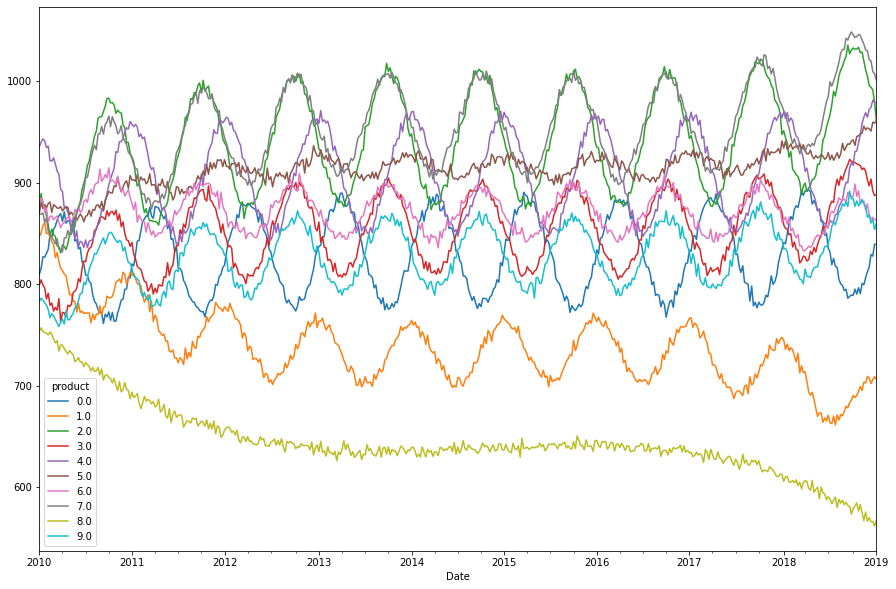

In [ ]:
store_0_pivot.plot(figsize=(15,10))

**See how the sales of `product 1` of `store 0` have changed over the years.**


In [ ]:
# filter  product id equal to 1 from store_0
product_1_s0 = store_id_0[store_id_0['product']==1]

In [ ]:
# create a column called year
product_1_s0['year'] = product_1_s0.index.year

# create a column called month
product_1_s0['month'] = product_1_s0.index.month

# create a DataFrame whose index represent months and columns respresnt years
result_df = pd.pivot_table(product_1_s0,
                           index='month',
                           columns='year',
                           values='number_sold',
                           aggfunc=np.mean)

result_df

<ipython-input-29-90a1ed1542aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_1_s0['year'] = product_1_s0.index.year
<ipython-input-29-90a1ed1542aa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_1_s0['month'] = product_1_s0.index.month


year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
month,,,,,,,,,,
1,853.057143,804.971429,776.571429,763.285714,760.857143,763.035714,762.114286,762.342857,738.928571,706.0
2,844.500000,788.928571,766.714286,756.285714,751.892857,755.392857,756.714286,751.321429,731.250000,NaN
3,823.714286,777.071429,751.714286,741.542857,738.857143,744.114286,743.428571,737.892857,719.178571,NaN
4,807.535714,760.357143,732.428571,722.642857,726.321429,726.607143,729.285714,715.257143,699.057143,NaN
5,783.542857,744.285714,723.250000,714.785714,712.857143,714.800000,713.228571,703.964286,676.642857,NaN
6,774.250000,730.714286,708.464286,701.628571,701.742857,707.821429,704.714286,694.178571,667.428571,NaN
7,769.071429,726.628571,706.371429,704.464286,703.964286,706.035714,704.057143,692.914286,665.485714,NaN
8,770.971429,732.642857,714.500000,706.892857,709.600000,711.600000,713.428571,700.107143,669.607143,NaN
9,778.035714,742.571429,724.857143,719.428571,724.500000,727.535714,722.035714,705.464286,680.142857,NaN


<AxesSubplot:xlabel='month'>

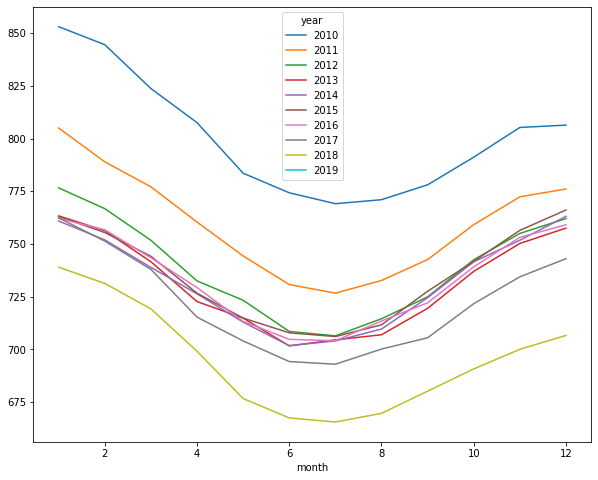

In [ ]:
result_df.plot(figsize=(10,8))

In [ ]:
sales = sales_data_processed[sales_data_processed.index.year == 2010]

In [ ]:
sales

,store,product,number_sold
Date,,,
2010-01-03,0.0,0.0,809.666667
2010-01-10,0.0,0.0,815.285714
2010-01-17,0.0,0.0,826.857143
2010-01-24,0.0,0.0,826.571429
2010-01-31,0.0,0.0,830.285714
...,...,...,...
2010-11-28,6.0,9.0,896.142857
2010-12-05,6.0,9.0,887.285714
2010-12-12,6.0,9.0,887.000000


In [ ]:
result_df = pd.pivot_table(sales,
                           index='product',
                           columns='store',
                           values='number_sold',
                           aggfunc=np.mean)
result_df

store,0.0,1.0,2.0,3.0,4.0,5.0,6.0
product,,,,,,,
0.0,814.062271,691.645604,730.582418,305.156593,924.849817,834.255495,811.742674
1.0,800.546703,802.442308,867.679487,371.824176,1008.849817,934.293956,960.146520
2.0,907.206960,688.096154,695.967949,316.774725,961.477106,857.508242,879.585165
3.0,821.579670,673.359890,739.724359,323.052198,918.606227,907.025641,838.608974
4.0,893.157509,744.239927,868.578755,371.177656,972.094322,960.552198,916.037546
5.0,879.134615,804.910256,818.333333,360.434066,1013.121795,838.928571,879.260073
6.0,882.863553,741.621795,760.983516,366.088828,969.210623,991.980769,939.440476
7.0,899.589744,722.505495,882.134615,394.939560,1067.628205,890.306777,881.778388
8.0,722.942308,700.670330,777.636447,301.819597,995.895604,823.369963,798.120879


In [ ]:
risk = result_df.loc[:, :].std()

In [ ]:
avg_return = result_df.loc[:, :].mean()

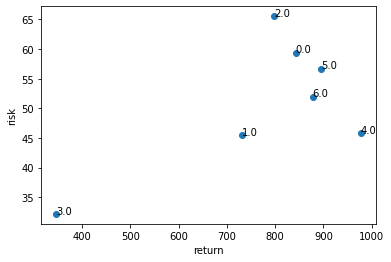

In [ ]:
fig, ax = plt.subplots()
ax.scatter(avg_return, risk)
plt.xlabel("return")
plt.ylabel("risk")
for i, txt  in enumerate(result_df):
  ax.annotate(txt, (avg_return[i], risk[i]))